importing required packages and data

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [31]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [32]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


preparing X and Y variables

In [33]:
x=df.drop(columns=['math score'],axis=1)

In [34]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [35]:
y=df['math score']

In [36]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

creating column transformer with 3 types of transformer

In [37]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oneh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oneh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [38]:
x=preprocessor.fit_transform(x)

In [39]:
x.shape

(1000, 19)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

eval function to calculate metrics after training

In [41]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [43]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbours Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance on Training set ')
    print('Root Mean Squared Error - {:.4f}'.format(model_train_rmse)) 
    print('Mean Absolute Error - {:.4f}'.format(model_train_mae))
    print('R2 Score - {:.4f}'.format(model_train_r2))

    print('Model Performance on Test Set')
    print('Root Mean Squared Error - {:.4f}'.format(model_test_rmse)) 
    print('Mean Absolute Error - {:.4f}'.format(model_test_mae))
    print('R2 Score - {:.4f}'.format(model_test_r2)) 
    r2_list.append(model_test_r2)  


LinearRegression
Model Performance on Training set 
Root Mean Squared Error - 5.3231
Mean Absolute Error - 4.2667
R2 Score - 0.8743
Model Performance on Test Set
Root Mean Squared Error - 5.3940
Mean Absolute Error - 4.2148
R2 Score - 0.8804
Lasso
Model Performance on Training set 
Root Mean Squared Error - 6.5938
Mean Absolute Error - 5.2063
R2 Score - 0.8071
Model Performance on Test Set
Root Mean Squared Error - 6.5197
Mean Absolute Error - 5.1579
R2 Score - 0.8253
Ridge
Model Performance on Training set 
Root Mean Squared Error - 5.3233
Mean Absolute Error - 4.2650
R2 Score - 0.8743
Model Performance on Test Set
Root Mean Squared Error - 5.3904
Mean Absolute Error - 4.2111
R2 Score - 0.8806
K-Neighbours Regressor
Model Performance on Training set 
Root Mean Squared Error - 5.7172
Mean Absolute Error - 4.5270
R2 Score - 0.8550
Model Performance on Test Set
Root Mean Squared Error - 7.2553
Mean Absolute Error - 5.6280
R2 Score - 0.7837
Decision Tree
Model Performance on Training set 

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2Score']).sort_values(by=['R2Score'],ascending=False)

,Model Name,R2Score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.853947
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.842897
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783681
4,Decision Tree,0.747307


linear regression

In [47]:
linearModel=LinearRegression(fit_intercept=True)
linearModel=linearModel.fit(x_train,y_train)
y_test_pred=linearModel.predict(x_test)
score=r2_score(y_test,y_test_pred)*100
print('Accuracy of the model is %.2f'%score)


Accuracy of the model is 88.04


plotting

Text(0, 0.5, 'Predicted')

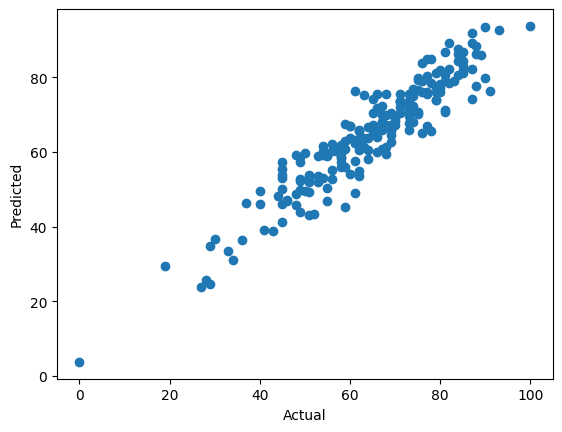

In [48]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

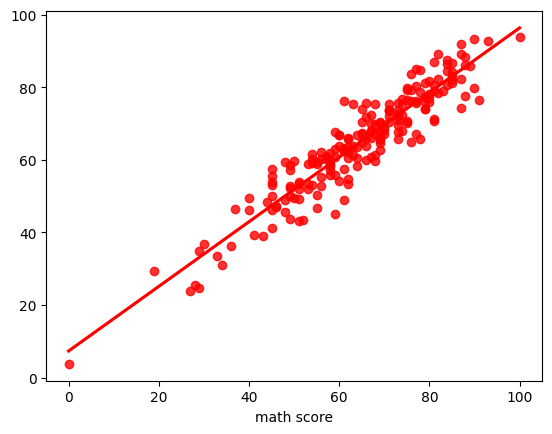

In [49]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color='red')

In [50]:
pred_diff=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_test_pred, 'Difference':y_test-y_test_pred})
pred_diff

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
